In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Define constants
input_shape = (224, 224, 3)
num_classes = 30
batch_size = 32
epochs = 10

# Create an instance of the Sequential model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

In [3]:
# Flatten the output and add fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [4]:
train_directory_path = "/kaggle/input/food-classification-dataset/food_datasets/train"
validation_directory_path = "/kaggle/input/food-classification-dataset/food_datasets/valid"

# Load and augment training data
train_generator = train_datagen.flow_from_directory(
    train_directory_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)

# Data augmentation for validation (only rescale)
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load and validate validation data
validation_generator = validation_datagen.flow_from_directory(
    validation_directory_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical'
)


Found 9845 images belonging to 30 classes.
Found 1315 images belonging to 30 classes.


In [5]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)

# Save the trained model
model.save('food_image_classifier_model.h5')

Epoch 1/10
307/307 [==============================] - 216s 651ms/step - loss: 3.0830 - accuracy: 0.1162 - val_loss: 2.6171 - val_accuracy: 0.2409
Epoch 2/10
307/307 [==============================] - 154s 501ms/step - loss: 2.6487 - accuracy: 0.2429 - val_loss: 2.2856 - val_accuracy: 0.3620
Epoch 3/10
307/307 [==============================] - 155s 503ms/step - loss: 2.3888 - accuracy: 0.3029 - val_loss: 2.1408 - val_accuracy: 0.3803
Epoch 4/10
307/307 [==============================] - 159s 518ms/step - loss: 2.2589 - accuracy: 0.3432 - val_loss: 2.1034 - val_accuracy: 0.3834
Epoch 5/10
307/307 [==============================] - 156s 509ms/step - loss: 2.1728 - accuracy: 0.3641 - val_loss: 1.9066 - val_accuracy: 0.4268
Epoch 6/10
307/307 [==============================] - 154s 503ms/step - loss: 2.1283 - accuracy: 0.3773 - val_loss: 1.9074 - val_accuracy: 0.4352
Epoch 7/10
307/307 [==============================] - 159s 519ms/step - loss: 2.0377 - accuracy: 0.3987 - val_loss: 1.8645 -

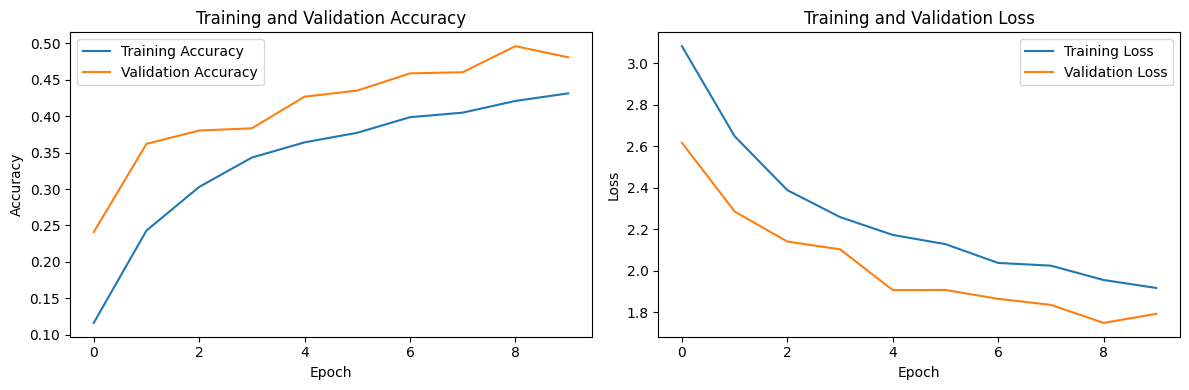

In [8]:
import matplotlib.pyplot as plt

# Extract training and validation accuracy and loss from the training history
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

# Create subplots for accuracy and loss
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_directory_path = "/kaggle/input/food-classification-dataset/food_datasets/train"


# Data augmentation for testing (only rescale)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load and preprocess test data
test_generator = test_datagen.flow_from_directory(
    test_directory_path,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False  # Important: Set shuffle to False for correct prediction labels
)

Found 9845 images belonging to 30 classes.


In [10]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Make predictions on test data
predictions = model.predict(test_generator)

# Convert predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Get the true labels from the test generator
true_labels = test_generator.classes

# Create a confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_mat)

# Generate a classification report
class_report = classification_report(true_labels, predicted_labels, target_names=test_generator.class_indices.keys())

# Print the classification report
print("\nClassification Report:")
print(class_report)

308/308 [==============================] - 53s 171ms/step
Confusion Matrix:
[[438   0   0   0   1  10   0   0   4   2   0   0  23   5   1   0   1   1
    3   0   0  13   2   0   0   0   2   3   0   5]
 [  0 228   6   3   0   3   0   0   3  41   7  18   2  10   0   0   9   1
   31   0   1   0  68   0   0   8   7  17   0  37]
 [  3  15 303   1   1   7   0   0   2  30   0  13   0   5   0   0   3   0
    9   0   0   0  34   0   0   1  45  18   0  10]
 [  4   1   1  73   0  19   0   0   0   1   0   0   2   1   1   0   3  18
    3   0   0   0   4   0   3   2   2   3   0   2]
 [  0   3   1   0 129   0   0   0   3  24   2   5   2   0   0   0   4   0
   47   0   0   1   2   0   0  11   0   2   0   3]
 [  8   4   2   7   0 317   0   0   2  26   0   2  13  14   2   0   7  12
    6   0   0   3  35   0   1   3   6  16   0  17]
 [  0   2   0   0   8   0   0   0   0   0   0   0   2   0   0   0   1   0
    7   0   0   1   0   0   0   0   0   0   1   2]
 [  1   1   0   0   3   1   0  21   5  42   0   0

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


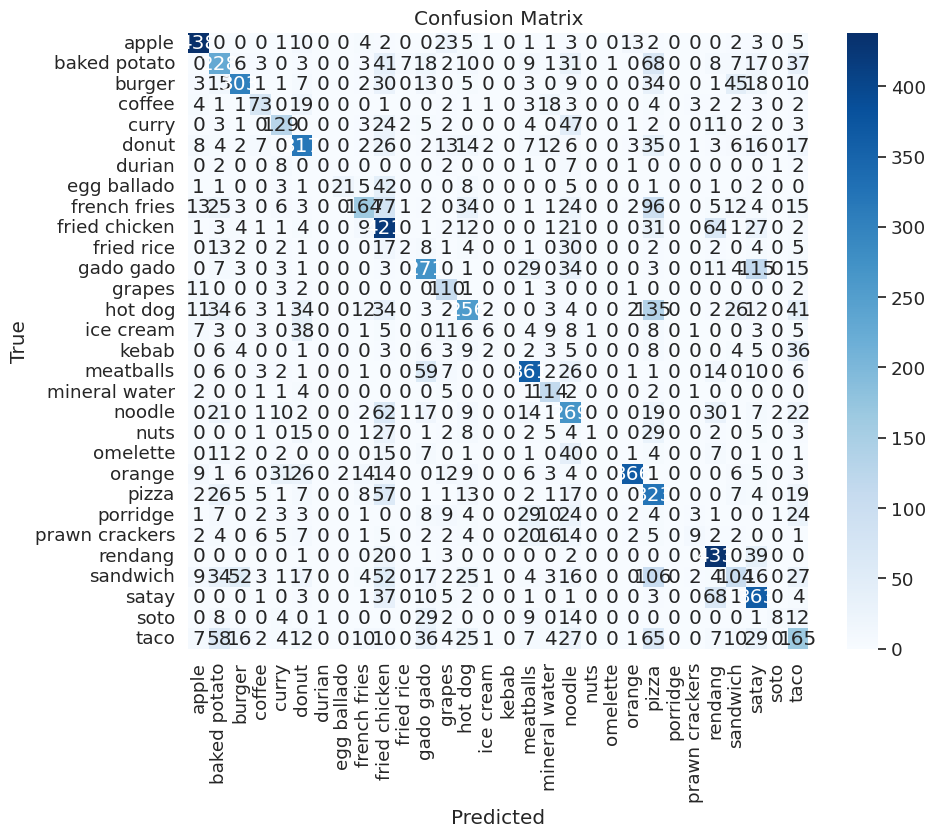

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a function to plot the confusion matrix as a heatmap
def plot_confusion_matrix(confusion_matrix, class_names):
    plt.figure(figsize=(10, 8))
    sns.set(font_scale=1.2)  # Adjust the font size for better readability

    # Create the heatmap
    sns.heatmap(
        confusion_matrix,
        annot=True,
        cmap='Blues',  # You can choose different color maps
        fmt='d',  # Display integer values
        xticklabels=class_names,
        yticklabels=class_names
    )

    # Set axis labels and title
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')

# Plot the confusion matrix
class_names = list(test_generator.class_indices.keys())
plot_confusion_matrix(confusion_mat, class_names)
plt.show()
